In [48]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [49]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [50]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
print(table_train)
table_test = pd.crosstab(y_test, predict_test, margins=True)
print(table_test)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


col_0     0.0   1.0   All
partner                  
0.0      4167   341  4508
1.0      1291  1533  2824
All      5458  1874  7332
col_0    0.0  1.0  All
partner               
0.0      454   51  505
1.0      151  159  310
All      605  210  815
Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

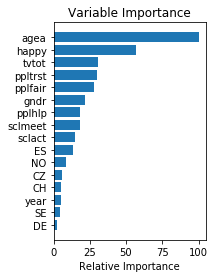

In [51]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [58]:
# Create training and test sets.
offset = int(X.shape[0] * 0.75)


# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000, #Changed from the original 500 to 1000
          'max_depth': 5, #Changed from the original 2 to 5
          'subsample' : .75,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
print(table_train)
table_test = pd.crosstab(y_test, predict_test, margins=True)
print(table_test)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


col_0     0.0   1.0   All
partner                  
0.0      3765     0  3765
1.0        27  2318  2345
All      3792  2318  6110
col_0     0.0  1.0   All
partner                 
0.0      1039  209  1248
1.0       358  431   789
All      1397  640  2037
Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0044189852700491

Test set accuracy:
Percent Type I errors: 0.10260186548846342
Percent Type II errors: 0.17574864997545409


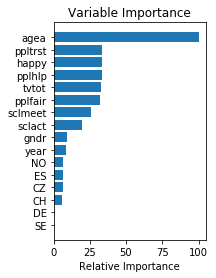

In [53]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [32]:
# Take the five most important variables and make them into features, based on being above or below average.

X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

X['age_more_ave'] = False
X.loc[X['agea'] > X.agea.mean(), 'age_more_ave'] = True
X['happy_more_ave'] = False
X.loc[X['happy'] > X.happy.mean(), 'happy_more_ave'] = True
X['tvtot_more_ave'] = False
X.loc[X['tvtot'] > X.tvtot.mean(), 'tvtot_more_ave'] = True
X['ppltrst_more_ave'] = False
X.loc[X['ppltrst'] > X.ppltrst.mean(), 'ppltrst_more_ave'] = True
X['pplfair_more_ave'] = False
X.loc[X['pplfair'] > X.pplfair.mean(), 'pplfair_more_ave'] = True
X.head()

C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\maken\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,age_more_ave,happy_more_ave,tvtot_more_ave,ppltrst_more_ave,pplfair_more_ave
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,True,True,False,False,True
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,True,True,True,False,True
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,False,False,False,True,True
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,True,True,True,True,False
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,True,True,True,True,True


In [35]:
X2 = X[['year', 'pplhlp', 'sclmeet', 'gndr', 'age_more_ave', 'happy_more_ave', 'tvtot_more_ave', 'ppltrst_more_ave', 'pplfair_more_ave']]
#X2 =  X.loc[:, ~df.columns.isin(['agea', 'happy', 'tvtot', 'ppltrst', 'pplfair'])]

# Put 90% of the data in the training set.
X2_train = X2[:offset]

# And put 10% in the test set.
X2_test = X2[offset:]

In [36]:
X2.head()

,year,pplhlp,sclmeet,gndr,age_more_ave,happy_more_ave,tvtot_more_ave,ppltrst_more_ave,pplfair_more_ave
0,6,5.0,5.0,2.0,True,True,False,False,True
1,6,5.0,3.0,2.0,True,True,True,False,True
2,6,8.0,6.0,1.0,False,False,False,True,True
3,6,7.0,6.0,2.0,True,True,True,True,False
4,6,5.0,7.0,2.0,True,True,True,True,True
